In [1]:
import pandas as pd
import networkx as nx

from pgmpy.models import BayesianModel
from pgmpy.estimators import BayesianEstimator 

from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate, cross_val_score

In [2]:
final_df = pd.read_csv('data/final.csv', delimiter='\t')

In [3]:
final_df

,Unnamed: 0,AE,Elevation,Habitats,VLM,SLR
0,0,0.731169,1.0,Developed,0.001169,0.27
1,1,-0.268828,0.0,Developed,0.001172,0.27
2,2,0.731176,1.0,Developed,0.001176,0.27
3,3,0.731179,1.0,Developed,0.001179,0.27
4,4,1.731183,2.0,Developed,0.001183,0.27
...,...,...,...,...,...,...
1789656,1789656,36.732577,37.0,Coastal Salt Flats,0.002577,0.27
1789657,1789657,35.732579,36.0,Coastal Salt Flats,0.002579,0.27
1789658,1789658,36.732581,37.0,Coastal Salt Flats,0.002581,0.27
1789659,1789659,37.732582,38.0,Coastal Salt Flats,0.002582,0.27


In [4]:
# # Step 3: Create Intervals for each df:
# # intervals are for all slr data frame:
min_mit = final_df.AE.min()
max_mit = final_df.AE.max()
interval_0_mit = pd.cut(x=final_df['AE'], bins=[1, 5, 10, max_mit])
interval_1_mit = pd.cut(x=final_df['AE'], bins=[min_mit, -12, -1, 0], right=False)
interval_2_mit = pd.cut(x=final_df['AE'], bins=[0, 1], include_lowest=True)

In [5]:
# # Step 4: Add intervals to dataframe:
# # Intermediate df:
# inter_df['Intervals_0'] = interval_0_mit
# inter_df['Intervals_1'] = interval_1_mit
# inter_df['Intervals_2'] = interval_2_mit
# inter_df['Intervals'] = ''

# inter_df.loc[ ((inter_df.Intervals_0.isnull()) & (inter_df.Intervals_1.isnull())), 'Intervals'] = interval_2_mit
# inter_df.loc[ ((inter_df.Intervals_0.isnull()) & (inter_df.Intervals_2.isnull())), 'Intervals'] = interval_1_mit
# inter_df.loc[ ((inter_df.Intervals_1.isnull()) & (inter_df.Intervals_2.isnull())), 'Intervals'] = interval_0_mit

# inter_df.drop(['Intervals_2', 'Intervals_1', 'Intervals_0'], axis='columns', inplace=True)

# Mitigation df:
final_df['Intervals_0'] = interval_0_mit
final_df['Intervals_1'] = interval_1_mit
final_df['Intervals_2'] = interval_2_mit
final_df['AE'] = ''

final_df.loc[ ((final_df.Intervals_0.isnull()) & (final_df.Intervals_1.isnull())), 'AE'] = 2
final_df.loc[ ((final_df.Intervals_0.isnull()) & (final_df.Intervals_2.isnull())), 'AE'] = 1
final_df.loc[ ((final_df.Intervals_1.isnull()) & (final_df.Intervals_2.isnull())), 'AE'] = 0

final_df.drop(['Intervals_2', 'Intervals_1', 'Intervals_0'], axis='columns', inplace=True)

# # Intermediate-High df:
# inter_high_df['Intervals_0'] = interval_0_mit
# inter_high_df['Intervals_1'] = interval_1_mit
# inter_high_df['Intervals_2'] = interval_2_mit
# inter_high_df['Intervals'] = ''

# inter_high_df.loc[ ((inter_high_df.Intervals_0.isnull()) & (inter_high_df.Intervals_1.isnull())), 'Intervals'] = interval_2_mit
# inter_high_df.loc[ ((inter_high_df.Intervals_0.isnull()) & (inter_high_df.Intervals_2.isnull())), 'Intervals'] = interval_1_mit
# inter_high_df.loc[ ((inter_high_df.Intervals_1.isnull()) & (inter_high_df.Intervals_2.isnull())), 'Intervals'] = interval_0_mit

# inter_high_df.drop(['Intervals_2', 'Intervals_1', 'Intervals_0'], axis='columns', inplace=True)

# # High df:
# high_df['Intervals_0'] = interval_0_mit
# high_df['Intervals_1'] = interval_1_mit
# high_df['Intervals_2'] = interval_2_mit
# high_df['Intervals'] = ''

# high_df.loc[ ((high_df.Intervals_0.isnull()) & (high_df.Intervals_1.isnull())), 'Intervals'] = interval_2_mit
# high_df.loc[ ((high_df.Intervals_0.isnull()) & (high_df.Intervals_2.isnull())), 'Intervals'] = interval_1_mit
# high_df.loc[ ((high_df.Intervals_1.isnull()) & (high_df.Intervals_2.isnull())), 'Intervals'] = interval_0_mit

# high_df.drop(['Intervals_2', 'Intervals_1', 'Intervals_0'], axis='columns', inplace=True)

In [6]:
final_df

,Unnamed: 0,AE,Elevation,Habitats,VLM,SLR
0,0,2,1.0,Developed,0.001169,0.27
1,1,1,0.0,Developed,0.001172,0.27
2,2,2,1.0,Developed,0.001176,0.27
3,3,2,1.0,Developed,0.001179,0.27
4,4,0,2.0,Developed,0.001183,0.27
...,...,...,...,...,...,...
1789656,1789656,0,37.0,Coastal Salt Flats,0.002577,0.27
1789657,1789657,0,36.0,Coastal Salt Flats,0.002579,0.27
1789658,1789658,0,37.0,Coastal Salt Flats,0.002581,0.27
1789659,1789659,0,38.0,Coastal Salt Flats,0.002582,0.27


In [7]:
min_elev = final_df.Elevation.min()
max_elev = final_df.Elevation.max()

In [8]:
interval_0 = pd.cut(x=final_df['Elevation'], bins=[1, 5, 10, max_elev])
interval_1 = pd.cut(x=final_df['Elevation'], bins=[min_elev, -10, -1, 0], right=False)
interval_2 = pd.cut(x=final_df['Elevation'], bins=[0, 1], include_lowest=True)

In [9]:
# Step 4: Add intervals to dataframe:
final_df['Intervals_0'] = interval_0
final_df['Intervals_1'] = interval_1
final_df['Intervals_2'] = interval_2
# elevation_classes['Intervals'] = ''

final_df.loc[ ((final_df.Intervals_0.isnull()) & (final_df.Intervals_1.isnull())), 'Elevation'] = 2
final_df.loc[ ((final_df.Intervals_0.isnull()) & (final_df.Intervals_2.isnull())), 'Elevation'] = 1
final_df.loc[ ((final_df.Intervals_1.isnull()) & (final_df.Intervals_2.isnull())), 'Elevation'] = 0

final_df.drop(['Intervals_2', 'Intervals_1', 'Intervals_0'], axis='columns', inplace=True)

In [10]:
final_df

,Unnamed: 0,AE,Elevation,Habitats,VLM,SLR
0,0,2,2.0,Developed,0.001169,0.27
1,1,1,2.0,Developed,0.001172,0.27
2,2,2,2.0,Developed,0.001176,0.27
3,3,2,2.0,Developed,0.001179,0.27
4,4,0,0.0,Developed,0.001183,0.27
...,...,...,...,...,...,...
1789656,1789656,0,0.0,Coastal Salt Flats,0.002577,0.27
1789657,1789657,0,0.0,Coastal Salt Flats,0.002579,0.27
1789658,1789658,0,0.0,Coastal Salt Flats,0.002581,0.27
1789659,1789659,0,0.0,Coastal Salt Flats,0.002582,0.27


In [11]:
vlm_bins = pd.qcut(final_df.VLM, q=3, precision=1, labels=['Bin #1', 'Bin #2', 'Bin #3'])

In [12]:
final_df['Bins'] = vlm_bins
final_df.loc[ (final_df.Bins == 'Bin #1'), 'VLM'] = 0
final_df.loc[ (final_df.Bins == 'Bin #2'), 'VLM'] = 1
final_df.loc[ (final_df.Bins == 'Bin #3'), 'VLM'] = 2

In [13]:
final_df['Elevation'].value_counts()

0.0    1243948
2.0     389632
1.0     156081
Name: Elevation, dtype: int64

In [48]:
model = BayesianModel([('SLR', 'AE'),
                       ('VLM', 'AE'),
                       ('Elevation', 'AE'),
                       
                
                       ])

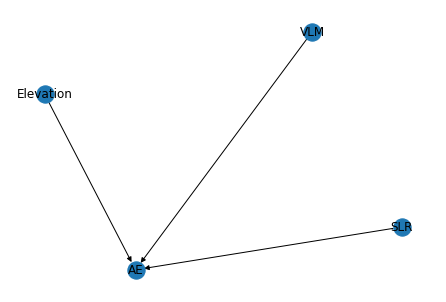

In [49]:
nx.draw(model, with_labels=True)

In [50]:
X_train, X_test, y_train, y_test = train_test_split(final_df, final_df, test_size=0.2, random_state=44)



In [51]:
X_train

,Unnamed: 0,AE,Elevation,Habitats,VLM,SLR,Bins
408313,408313,0,0.0,Forest Plantations,2.0,0.27,Bin #3
469726,469726,0,0.0,Farmland,2.0,0.27,Bin #3
554955,554955,0,0.0,Developed,1.0,0.27,Bin #2
1289304,1289304,0,0.0,Farmland,1.0,0.27,Bin #2
536819,536819,0,0.0,Developed,1.0,0.27,Bin #2
...,...,...,...,...,...,...,...
49723,49723,0,0.0,Saltmarsh,1.0,0.27,Bin #2
156845,156845,0,0.0,Forest Plantations,1.0,0.27,Bin #2
1305329,1305329,0,0.0,Developed,0.0,0.27,Bin #1
1772963,1772963,0,0.0,Coastal Sand Plains,2.0,0.27,Bin #3


In [52]:
X_test 

,Unnamed: 0,AE,Elevation,Habitats,VLM,SLR,Bins
1040070,1040070,2,2.0,Developed,1.0,0.27,Bin #2
831855,831855,0,0.0,Sand Sheets and Dunes,2.0,0.27,Bin #3
1110521,1110521,2,2.0,Coastal Sand Plains,0.0,0.27,Bin #1
1638620,1638620,0,0.0,Coastal Salt Flats,1.0,0.27,Bin #2
1374829,1374829,0,0.0,Coastal Sand Plains,1.0,0.27,Bin #2
...,...,...,...,...,...,...,...
1137964,1137964,0,0.0,Dredged Seabed,0.0,0.27,Bin #1
957966,957966,0,0.0,Coastal Sand Plains,0.0,0.27,Bin #1
247788,247788,1,2.0,Saltmarsh,0.0,0.27,Bin #1
760235,760235,0,0.0,Sand Sheets and Dunes,1.0,0.27,Bin #2


In [53]:
model.fit(X_train)

In [54]:
model.check_model()

True

In [55]:
test_data = X_test.drop(columns=['AE', 'Habitats', 'Bins', 'Unnamed: 0'], axis=1)
y_pred = model.predict(test_data)

100%|██████████| 9/9 [00:00<00:00, 108.38it/s]


In [56]:
y_pred

,AE
0,2
1,0
2,2
3,0
4,0
...,...
357928,0
357929,0
357930,2
357931,0


In [58]:
y_pred.AE.value_counts()

0    248767
2     77858
1     31308
Name: AE, dtype: int64

In [59]:
from pgmpy.inference import VariableElimination
model_infer = VariableElimination(model)